# Mini-projet : Ultimate TicTacToe

### Réalisé par : Arij Riabi & Bastien Peruchena

### Encadré par : Nicolas MAUDET

Lien enoncé: https://github.com/nmaudet/teaching-iaro/blob/master/tme-projet/sujet-tme-2018.ipynb

## Introduction

Tic-tac-toe ultime est plus complexe que la plupart des autres variantes de tic-tac-toe, car il n'y a pas de stratégie claire à jouer et c'est parce que même si chaque coup doit être joué dans un tableau local, ce qui équivaut à un tableau de tic-tac-toe normal, chaque mouvement doit prendre en compte le tableau global. Donc chaque joueur doit décider s'il va se concentrer de jouer sur les petits ou le grand tableau , s'il cherche à maximiser son gain dans ses coups ou à bloquer l'adversaire puisque son coup détermine ou il joue ...

<b> Fichiers Ajoutées/Modifiées :</b>
<br> -Fichier UltimateTicTacToeNew contient la fonction Jouer qui nous permet de jouer selon les parametres passés , Fonction victoire pour tester les cas des victoires et matchs nulls et fonction aletoire qui permet de jouer d'une maniere alétoire
<br> -Fichier Test : Contient la fonction Tournoi qui simule un tournoi et la fonction Dessine qui nous permet d'observer les gains cumulés dans les tournois
<br> -Fichier Astar : contient l'implementation de l'algorithme A* inspiré de l'exemple de cours
<br> -Fichier Glouton :  contient l'implementation de l'algorithme Glouton

## I- Recherche de chemin : l'algorithme A*

Premièrement, nous avons implémenté l'algorithme de recherche de chemin,afin de permettre à un personnage de ramasser le plus rapidement possible sa fiole en premier lieu et apres la depsoer dans la position choisie. On a utiliser comme heuristuque la distance de Manhattan ..


## II- Stratégies :

On a notre fonction <b> Tournoi </b> qui prend 3 parametres i , s1 et s2 :
<br> i = le joueur qui commence en premier
<br> s1 = la stratégie de premier joueur
<br> s2 = la startégie de deuxieme joueur
<br>elle retourne les gains cumulés pour les joueurs avec les utilités +1 quand il gagne -0.25 quand il perd et 0 pour les matchs nuls 

In [1]:
import Test #fichier qui contient notre fonction Tournoi et dessine 

### Pour les Tests on va à chaque fois tester l'algorithme contre un autre algorithme et contre lui meme en changeant  qui commence en premier

### 1) Aléatoire :

Une premiere version qui consiste de chaque joueur joue de manière aléatoire, mais obéissant aux règles. A chaque fois l'autre joueur l'envoie jouer dans un morpion où il choisit aléatoirement où il joue.
<br> c'est une stratégie stationnaire 

##### Un tournoi de six matchs entre deux joueurs aleatoires :

In [2]:
#Joueur 1 commence en premier
toPlot,gainsCumules=Test.Tournoi(0,0,0)

Match N° 0
j1: [0, 1, 7]
j2: [3, 2, 8, 6, 4]
Victoire joueur2
Match N° 1
j1: [5, 6, 8, 1]
j2: [7, 4, 3]
bloqués:  [4, 8, 1]
Match Null
Match N° 2
j1: [6, 0, 3]
j2: [2, 8]
Victoire joueur1
Match N° 3
j1: [6, 0, 4, 2]
j2: []
Victoire joueur1
Match N° 4
j1: [2, 8, 0, 3]
j2: [4, 7, 6, 5]
bloqués:  [8]
Match Null
Match N° 5
j1: [6, 1, 0, 2]
j2: [8]
Victoire joueur1


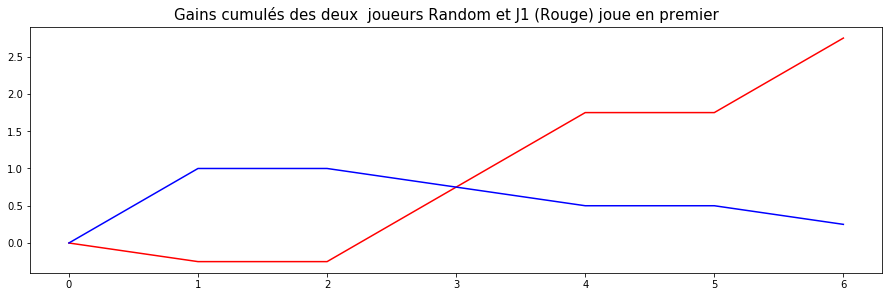

In [3]:
%matplotlib inline
legende = "Gains cumulés des deux  joueurs Random et J1 (Rouge) joue en premier"
Test.dessin(toPlot,gainsCumules,legende)

In [4]:
#Joueur 2 commence en premier
toPlot,gainsCumules=Test.Tournoi(1,0,0)

Match N° 0
j1: [1, 5, 7, 3]
j2: [6, 2, 8, 0]
bloqués:  [4]
Match Null
Match N° 1
j1: [7, 0, 8, 5, 3]
j2: [1, 2, 6, 4]
Victoire joueur2
Match N° 2
j1: [1, 4, 0, 7]
j2: [2, 6, 8]
Victoire joueur1
Match N° 3
j1: [4]
j2: [6, 2, 1, 3]
bloqués:  [7, 8, 4, 3]
Match Null
Match N° 4
j1: [2, 7]
j2: [5, 3, 0, 4]
Victoire joueur2
Match N° 5
j1: [6, 4, 7]
j2: [8, 0, 1]
bloqués:  [2, 8, 7]
Match Null


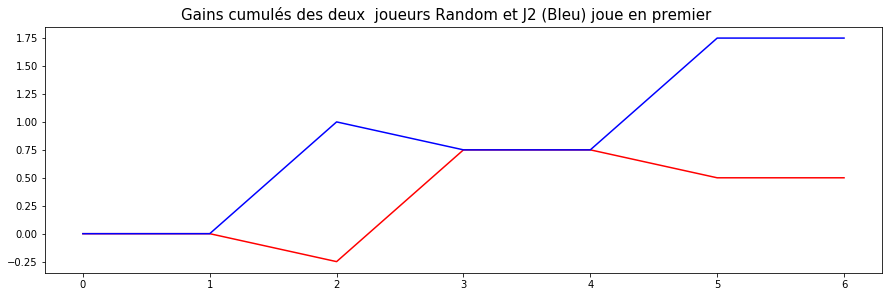

In [5]:
%matplotlib inline
legende = "Gains cumulés des deux  joueurs Random et J2 (Bleu) joue en premier"
Test.dessin(toPlot,gainsCumules,legende)

Pour les deux joueurs aléatoires il ya a pas une grande différence si on joue en premier ou pas et le comportement de joueur change complétement puisque c'est aléatoire

### 2)  Glouton

###### a)  Glouton V1

L'algorithme glouton que nous avons implémenté a pour idée de choisir la solution optimale sur le morpion en cours sans prendre en compte l'ensemble des morpions. Ainsi il utilisera comme données tout ce qui peut concerner le morpion où il doit jouer: toutes les fioles posées, ses fioles posées etc... S'il ne peut pas jouer dans le morpion indiqué actuellement alors il en choisit un autre aléatoirement. S'il n'a posé aucune fiole sur le morpion où il doit jouer, il cherchera à poser sur la case du milieu. S'il ne peut pas il choisira une case sur les coins sinon aléatoire. S'il a déjà posé des fioles il cherchera s'il peut à partir de ces fioles formé un triplet gagnant. Il privilégiera d'abord les solutions diagonales puis les solutions horizontales et verticales. Pour finir s'il ne trouve pas de solutions gagnante alors il choisiera une case aléatoirement.


##### Un tournoi de six matchs entre un joueur aleatoire et un joueur glouton v1 :

In [6]:
#Glouton commence en premier
toPlot,gainsCumules=Test.Tournoi(0,1,0)


Match N° 0
j1: [2, 7, 3, 5]
j2: [4, 0, 8]
Victoire joueur2
Match N° 1
j1: [5, 1, 8, 7, 3]
j2: [4, 0, 2, 6]
Victoire joueur2
Match N° 2
j1: [1, 2, 3, 5, 6]
j2: [4, 0]
bloqués:  [8, 7]
Match Null
Match N° 3
j1: [7, 6]
j2: [4, 0, 8]
Victoire joueur2
Match N° 4
j1: [3]
j2: [4, 0, 8]
Victoire joueur2
Match N° 5
j1: [1, 6, 7, 3, 2]
j2: [4, 0, 8]
Victoire joueur2


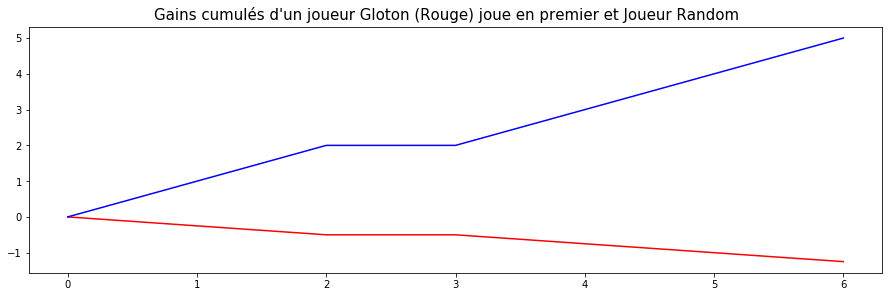

In [7]:
%matplotlib inline
legende = "Gains cumulés d'un joueur Gloton (Rouge) joue en premier et Joueur Random"
Test.dessin(toPlot,gainsCumules,legende)

In [8]:
#Aleatoire commence en premier
toPlot,gainsCumules=Test.Tournoi(1,1,0)

Match N° 0
j1: [1, 3, 6]
j2: [4, 0, 8]
Victoire joueur2
Match N° 1
j1: [1, 0, 2]
j2: [4]
Victoire joueur1
Match N° 2
j1: [8, 5, 7, 1]
j2: [4, 0, 2, 3, 6]
Victoire joueur2
Match N° 3
j1: [5, 7, 8, 1, 6]
j2: [4, 0, 2]
Victoire joueur1
Match N° 4
j1: [1, 5, 7]
j2: [4, 0, 8]
Victoire joueur2
Match N° 5
j1: [5, 7, 1, 2]
j2: [4, 0, 8]
Victoire joueur2


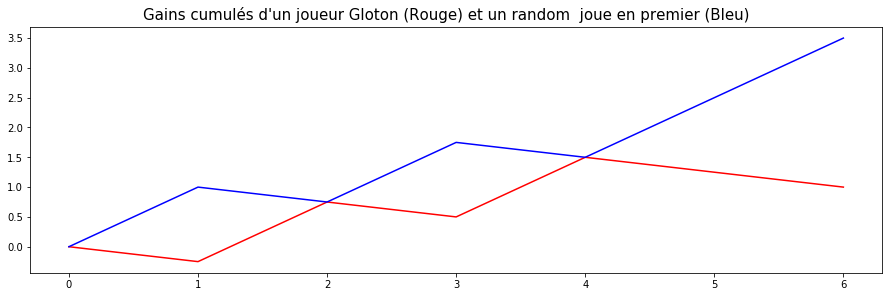

In [9]:
%matplotlib inline
legende = "Gains cumulés d'un joueur Gloton (Rouge) et un random  joue en premier (Bleu)"
Test.dessin(toPlot,gainsCumules,legende)

Le rendement de Joueur Gluton est mieux quand il n'est pas le premier

##### Un tournoi de six matchs entre 2 joueurs glouton v1 :

In [10]:
#Joueur 1 commence en premier
toPlot,gainsCumules=Test.Tournoi(0,1,1)

Match N° 0
j1: [0, 1, 7]
j2: [4, 8, 6, 2]
Victoire joueur2
Match N° 1
j1: [2, 6]
j2: [4, 0, 8]
Victoire joueur2
Match N° 2
j1: [4, 8, 6]
j2: [0, 1, 2]
Victoire joueur2
Match N° 3
j1: [0, 8, 2, 7]
j2: [4, 6, 3, 5]
Victoire joueur2
Match N° 4
j1: [4, 6, 3]
j2: [0, 8, 1]
bloqués:  [2, 5, 7]
Match Null
Match N° 5
j1: [4, 6, 0, 2]
j2: [8, 1]
Victoire joueur1


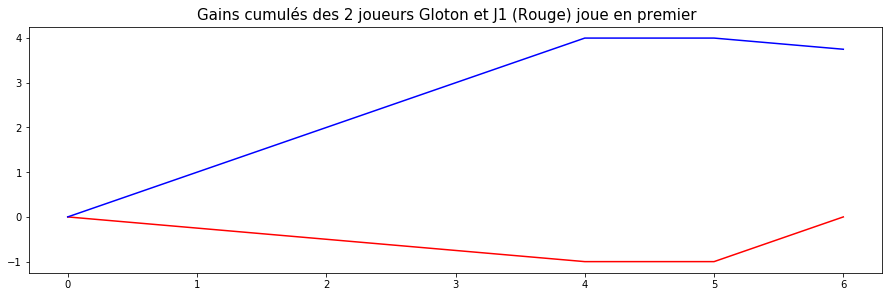

In [11]:
%matplotlib inline
legende = "Gains cumulés des 2 joueurs Gloton et J1 (Rouge) joue en premier"
Test.dessin(toPlot,gainsCumules,legende)

In [12]:
#Joueur 2 commence en premier
toPlot,gainsCumules=Test.Tournoi(1,1,1)

Match N° 0
j1: [0, 6, 8, 7]
j2: [4, 1, 2]
Victoire joueur1
Match N° 1
j1: [4, 8, 6, 2]
j2: [0, 5, 7]
Victoire joueur1
Match N° 2
j1: [4, 0, 8]
j2: [2, 6]
Victoire joueur1
Match N° 3
j1: [4, 3, 7]
j2: [8, 0, 1, 6, 2]
Victoire joueur2
Match N° 4
j1: [0, 6, 3]
j2: [4, 1, 8]
Victoire joueur1
Match N° 5
j1: [8, 6, 2, 4]
j2: [0, 1]
Victoire joueur1


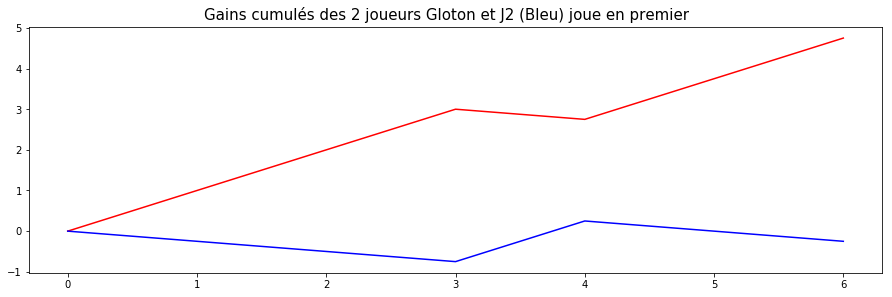

In [13]:
%matplotlib inline
legende = "Gains cumulés des 2 joueurs Gloton et J2 (Bleu) joue en premier"
Test.dessin(toPlot,gainsCumules,legende)

Le rendement de Joueur Gluton est mieux quand il n'est pas le premier contre un autre glouton

###### a)  Glouton V2

La deuxième version est identique en tout point à la version précédente à un point près: Cette version ne choisit plus aléatoirement où jouer si elle ne sait pas gagner, elle choisira d'envoyer l'autre joueur dans le morpion dans lequel il a joué le moins de fioles.


##### Un tournoi de six matchs entre un joueur aleatoire et un joueur glouton v2 :

In [14]:
#Glouton commence en premier
toPlot,gainsCumules=Test.Tournoi(0,2,0)


Match N° 0
j1: [1, 6]
j2: [4, 0, 8]
Victoire joueur2
Match N° 1
j1: [2, 6, 5, 3, 7]
j2: [4, 0, 1]
bloqués:  [8]
Match Null
Match N° 2
j1: [7, 1, 5, 2]
j2: [4, 0, 6, 8]
Victoire joueur2
Match N° 3
j1: [1, 6, 7]
j2: [4, 0, 8]
Victoire joueur2
Match N° 4
j1: [3, 2, 1]
j2: [4, 0, 8]
Victoire joueur2
Match N° 5
j1: [7, 1, 6, 2, 5]
j2: [4, 8, 0]
Victoire joueur2


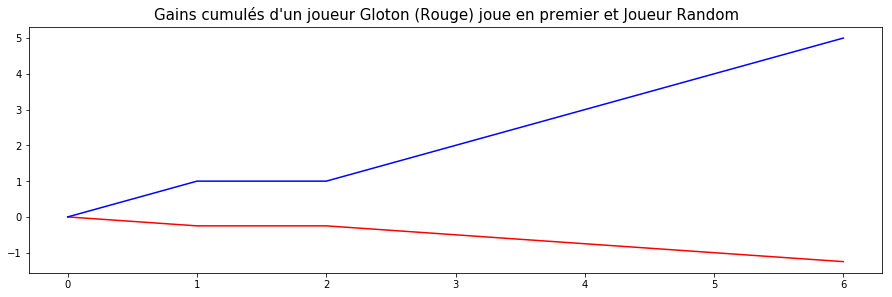

In [15]:
%matplotlib inline
legende = "Gains cumulés d'un joueur Gloton (Rouge) joue en premier et Joueur Random"
Test.dessin(toPlot,gainsCumules,legende)

In [16]:
#Aleatoire commence en premier
toPlot,gainsCumules=Test.Tournoi(1,2,0)

Match N° 0
j1: [6, 5, 1, 2]
j2: [4, 0, 8]
Victoire joueur2
Match N° 1
j1: [3, 1, 7, 5]
j2: [4, 0, 8]
Victoire joueur2
Match N° 2
j1: [0, 8, 7, 5, 3, 6]
j2: [4, 2]
Victoire joueur1
Match N° 3
j1: [1, 3, 8, 5]
j2: [4, 0, 6]
bloqués:  [0, 7]
Match Null
Match N° 4
j1: [7, 3, 2, 6, 5]
j2: [4, 0, 1]
bloqués:  [8, 1]
Match Null
Match N° 5
j1: [5, 3, 7, 1]
j2: [4, 0, 8]
Victoire joueur2


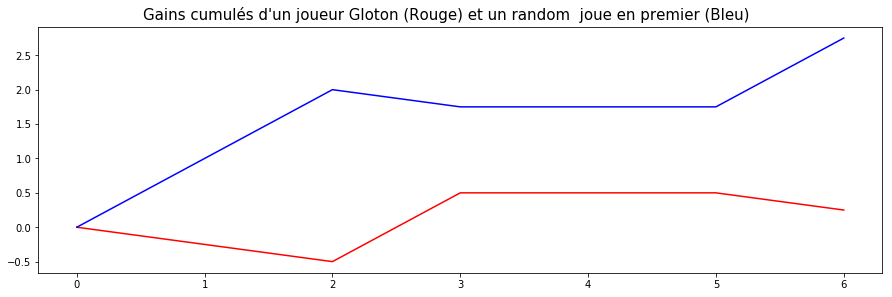

In [17]:
%matplotlib inline
legende = "Gains cumulés d'un joueur Gloton (Rouge) et un random  joue en premier (Bleu)"
Test.dessin(toPlot,gainsCumules,legende)

##### Un tournoi de six matchs entre un joueur glouton v2 et un joueur glouton v1 :

In [18]:
#Glouton v2 commence en premier
toPlot,gainsCumules=Test.Tournoi(0,2,1)

Match N° 0
j1: [4, 8]
j2: [6, 1, 2, 0]
Victoire joueur2
Match N° 1
j1: [4, 6, 1]
j2: [0, 8, 2, 3]
bloqués:  [2, 1]
Match Null
Match N° 2
j1: [2, 6]
j2: [4, 0, 8]
Victoire joueur2
Match N° 3
j1: [1]
j2: [6, 8, 4, 0]
Victoire joueur2
Match N° 4
j1: [8, 0, 6]
j2: [4, 3, 2]
bloqués:  [0, 2, 1]
Match Null
Match N° 5
j1: [8, 6, 1, 7]
j2: [4, 0, 3, 2]
Victoire joueur1


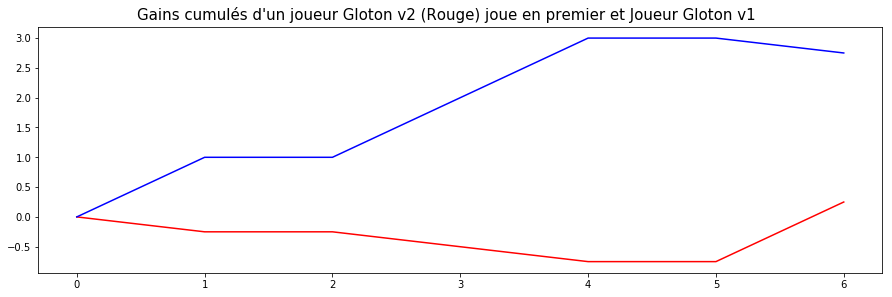

In [19]:
%matplotlib inline
legende = "Gains cumulés d'un joueur Gloton v2 (Rouge) joue en premier et Joueur Gloton v1"
Test.dessin(toPlot,gainsCumules,legende)

In [20]:
#Glouton v1 commence en premier
toPlot,gainsCumules=Test.Tournoi(1,2,1)

Match N° 0
j1: [4, 0, 8]
j2: [2, 6]
Victoire joueur1
Match N° 1
j1: [4, 6, 8, 2]
j2: [0]
Victoire joueur1
Match N° 2
j1: [6, 4, 1, 3]
j2: [8, 7, 0, 2, 5]
Victoire joueur2
Match N° 3
j1: [8, 1, 2]
j2: [4, 6, 7, 3]
bloqués:  [2, 0]
Match Null
Match N° 4
j1: [0, 2, 1]
j2: [4, 8, 6]
Victoire joueur1
Match N° 5
j1: [4, 6, 0, 5]
j2: [8, 1, 3, 7]
bloqués:  [2]
Match Null


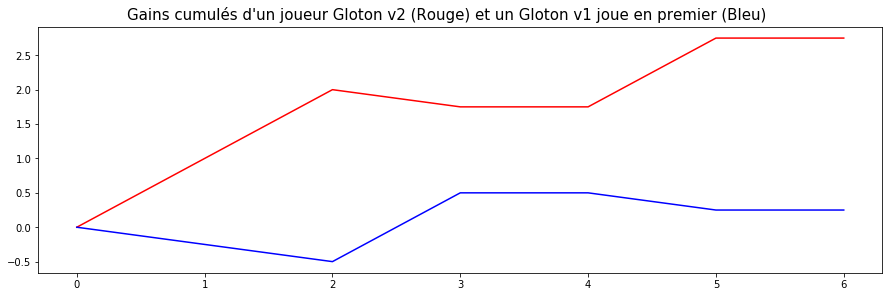

In [21]:
%matplotlib inline
legende = "Gains cumulés d'un joueur Gloton v2 (Rouge) et un Gloton v1 joue en premier (Bleu)"
Test.dessin(toPlot,gainsCumules,legende)

##### Un tournoi de six matchs entre deux joueurs glouton v2 :

In [22]:
#Joueur 1 commence en premier
toPlot,gainsCumules=Test.Tournoi(0,2,2)

Match N° 0
j1: [4, 6, 1, 5]
j2: [0, 8, 2, 7, 3]
bloqués:  []
Match Null
Match N° 1
j1: [0]
j2: [4, 6, 8, 2]
Victoire joueur2
Match N° 2
j1: [1]
j2: [6, 0, 4, 8]
Victoire joueur2
Match N° 3
j1: [0, 1, 2]
j2: [4, 8, 6]
Victoire joueur1
Match N° 4
j1: [2, 6]
j2: [4, 0, 8]
Victoire joueur2
Match N° 5
j1: [8, 2, 4, 1]
j2: [0, 6, 7]
bloqués:  [1, 7]
Match Null


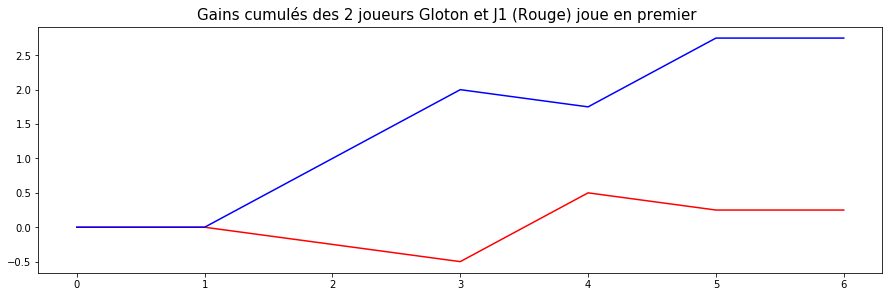

In [23]:
%matplotlib inline
legende = "Gains cumulés des 2 joueurs Gloton et J1 (Rouge) joue en premier"
Test.dessin(toPlot,gainsCumules,legende)

In [24]:
#Joueur 1 commence en premier
toPlot,gainsCumules=Test.Tournoi(1,2,2)

Match N° 0
j1: [0, 8, 2, 6, 7]
j2: [4, 1]
Victoire joueur1
Match N° 1
j1: [8, 1]
j2: [4, 6, 0, 2]
Victoire joueur2
Match N° 2
j1: [4, 8]
j2: [6, 1, 2, 0]
Victoire joueur2
Match N° 3
j1: [0, 8, 2, 6, 7]
j2: [4, 1, 3]
Victoire joueur1
Match N° 4
j1: [0, 2, 6, 5]
j2: [4, 8, 1, 7]
Victoire joueur2
Match N° 5
j1: [4, 0, 8]
j2: [2, 6]
Victoire joueur1


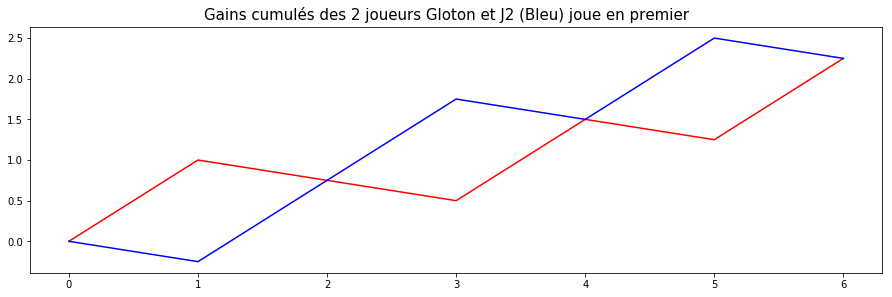

In [25]:
%matplotlib inline
legende = "Gains cumulés des 2 joueurs Gloton et J2 (Bleu) joue en premier"
Test.dessin(toPlot,gainsCumules,legende)

#### Stratégie MinMAX alpha-beta


Le nombre d'états dans ce jeu est beaucoup plus élevé. Il y a 81 cases pour une grille 3x3 de 3x3 tic-tac-toe. Étant donné que chaque carré peut avoir 3 valeurs possibles (vide, fiole jaune ou fiole bleu), le nombre d'états possibles a varié de 3  le tic-tac-toe régulier à 3^8 !! Pour une certaine perspective, c'est trop grand En réalité, tous les états ne sont pas atteignables (à chercher pour minimiser la recherche )

<b> Les Fonctions utilisées pour implémenter minMaxAlpha-beta </b>
<br>-Victoire 2 : renvoie l'utilité d'etat courant representé par nos structure si c'est un état terminal sinon -1
<br>-after_move: renvoie les structures qui réprensentent un état dans le jeu aprés une action donnée  et change le tour pour jouer
<br>-max_value: represente le noued qui maximise avec des des coupures alpha-beta 
<br>-min_value: represente le noued qui minimise avec des des coupures alpha-beta
<br>-alphabeta: lance l'algorithme de recherche

##### Un Tournoi ente un joueur alpha-beta et Glouton V2

In [26]:
toPlot,gainsCumules=Test.Tournoi(0,3,1)

Match N° 0
j1: [0, 4, 8]
j2: [2, 5, 3, 1, 6]
Victoire joueur1
Match N° 1
j1: [0, 4, 8]
j2: [2, 1, 6, 5, 3]
Victoire joueur1
Match N° 2
j1: [4, 0]
j2: [2, 1, 3, 5, 8]
Victoire joueur2
Match N° 3
j1: [4, 0, 7]
j2: [1, 2, 3, 5, 6]
bloqués:  [8]
Match Null
Match N° 4
j1: [4, 0, 8]
j2: [2, 3, 1, 6, 7]
Victoire joueur1
Match N° 5
j1: [4, 0, 8]
j2: [2, 1, 5, 6]
Victoire joueur1


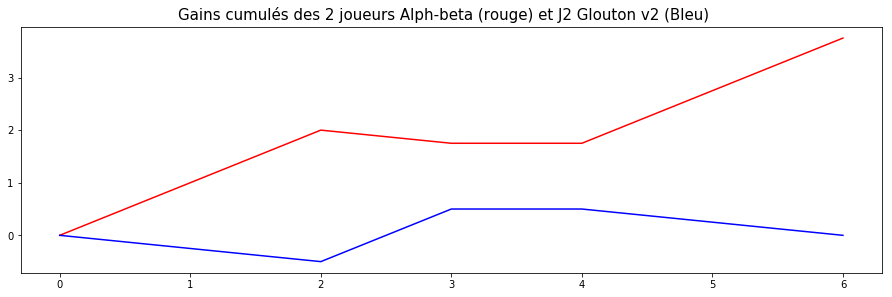

In [27]:
%matplotlib inline
legende = "Gains cumulés des 2 joueurs Alph-beta (rouge) et J2 Glouton v2 (Bleu) "
Test.dessin(toPlot,gainsCumules,legende)